In [1]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn import metrics

In [2]:
X_train=pd.read_csv('/content/drive/MyDrive/VNP proekt/out/t_x_train.csv')
X_test=pd.read_csv('/content/drive/MyDrive/VNP proekt/out/t_x_test.csv')
y_train=pd.read_csv('/content/drive/MyDrive/VNP proekt/out/t_y_train.csv')
y_test=pd.read_csv('/content/drive/MyDrive/VNP proekt/out/t_y_test.csv')

num_leaves (int, optional (default=31)) – Maximum tree leaves for base learners.

max_depth (int, optional (default=-1)) – Maximum tree depth for base learners, <=0 means no limit.

learning_rate (float, optional (default=0.1)) – Boosting learning rate. You can use callbacks parameter of fit method to shrink/adapt learning rate in training using reset_parameter callback. Note, that this will ignore the learning_rate argument in training.

n_estimators (int, optional (default=100)) – Number of boosted trees to fit.

In [3]:
num_leaves = (5, 10, 20, 31, 50, 100)
max_depths = (-1, 1, 4, 8, 16, 32)
learning_rates = (0.001, 0.01, 0.02, 0.05, 0.1, 0.2)
n_estimators = (10, 20, 40, 80, 100, 160, 320, 640, 1280, 2560, 5120)

In [4]:
num_leaves_res = []
max_depths_res = []
learning_rates_res = []
n_esimators_res = []
score_res = []

In [5]:
for m_d in max_depths:
  for l_r in learning_rates:
    for n_e in n_estimators:
      for n_l in num_leaves:

        model = LGBMRegressor(n_estimators=n_e, max_depth=m_d, learning_rate=l_r, num_leaves=n_l)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = mean_squared_error(y_test, y_pred)
              
        max_depths_res.append(m_d)
        learning_rates_res.append(l_r)
        n_esimators_res.append(n_e)
        num_leaves_res.append(n_l)
        score_res.append(score)

In [6]:
score_res = [sqrt(s) for s in score_res]

In [7]:
table = pd.DataFrame(
    {
        'score': score_res,
        'max_depth': max_depths_res,
        'learning_rate': learning_rates_res,
        'n_estimators': n_esimators_res,
        'num_leaves': num_leaves_res,
    }
)

In [8]:
table.sort_values(by='score', ascending=True).head()

,score,max_depth,learning_rate,n_estimators,num_leaves
1087,24006.623816,4,0.1,160,10
1873,24009.842128,16,0.1,100,10
2269,24009.842128,32,0.1,100,10
289,24009.842128,-1,0.1,100,10
1478,24036.305013,8,0.1,100,20


In [10]:
from lightgbm import LGBMRegressor

lgbmr = LGBMRegressor(max_depth = 4, learning_rate=0.1, n_estimators=160, num_leaves=10)
lgbmr.fit(X_train, y_train)
lgbmr_pred = lgbmr.predict(X_test)

print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, lgbmr_pred)))

Root Mean Squared Error (RMSE): 24006.623815793067


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

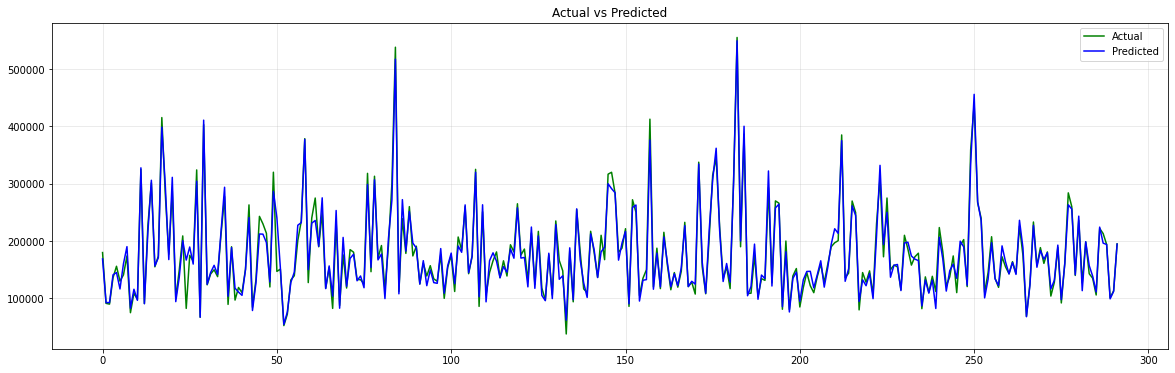

In [36]:
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(lgbmr_pred, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.rcParams["figure.figsize"] = (20,7)
plt.show()